In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']

df = pd.read_csv(url, names=column_names, na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,NaN
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,NaN
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,NaN
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,NaN


In [ ]:
df.isna().sum()

mpg               0
cylinders         0
displacement      0
horsepower        6
weight            0
acceleration      0
model year        0
origin            0
car name        398
dtype: int64

In [ ]:
df.dropna(subset = ['horsepower'], inplace=True)
df.isna().sum()

mpg               0
cylinders         0
displacement      0
horsepower        0
weight            0
acceleration      0
model year        0
origin            0
car name        392
dtype: int64

In [ ]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,0.0
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592,1.576531,NaN
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,0.805518,NaN
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,73.000000,1.000000,NaN
50%,22.750000,4.000000,151.000000,93.500000,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,79.000000,2.000000,NaN
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000,NaN


In [ ]:
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled.describe()

/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:461: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.8/dist-packages/sklearn/preprocessing/_data.py:462: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,0.0
mean,0.384200,0.494388,0.326646,0.317768,0.386897,0.448888,0.498299,0.288265,NaN
std,0.207580,0.341157,0.270398,0.209191,0.240829,0.164218,0.306978,0.402759,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.212766,0.200000,0.095607,0.157609,0.173589,0.343750,0.250000,0.000000,NaN
50%,0.365691,0.200000,0.214470,0.258152,0.337539,0.446429,0.500000,0.000000,NaN
75%,0.531915,1.000000,0.536822,0.434783,0.567550,0.537202,0.750000,0.500000,NaN
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN


In [ ]:
df_scaled.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,NaN
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,NaN
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,NaN
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,NaN
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,NaN
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,NaN
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,NaN
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,NaN
car name,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = df_scaled[['cylinders', 'displacement', 'horsepower', 'weight']]
y = df_scaled['mpg']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)

In [ ]:
X_train.shape

(313, 4)

In [ ]:
model = Sequential()

model.add(Dense(32, input_dim=4, activation='linear'))
model.add(Dense(16,activation='linear'))
model.add(Dense(1,activation='linear'))
model.compile(loss='mse', optimizer='sgd', metrics='mae')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                160       
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 705
Trainable params: 705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
res = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test,y_test), verbose=1)

Epoch 1/100
40/40 [==============================] - 1s 6ms/step - loss: 0.0580 - mae: 0.1765 - val_loss: 0.0213 - val_mae: 0.1054
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0200 - mae: 0.1039 - val_loss: 0.0171 - val_mae: 0.0963
Epoch 3/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0167 - mae: 0.0958 - val_loss: 0.0146 - val_mae: 0.0836
Epoch 4/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0156 - mae: 0.0928 - val_loss: 0.0137 - val_mae: 0.0835
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0153 - mae: 0.0929 - val_loss: 0.0162 - val_mae: 0.0953
Epoch 6/100
40/40 [==============================] - 0s 2ms/step - loss: 0.0151 - mae: 0.0929 - val_loss: 0.0134 - val_mae: 0.0843
Epoch 7/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0150 - mae: 0.0915 - val_loss: 0.0132 - val_mae: 0.0833
Epoch 8/100
40/40 [==============================] - 0s 3ms/step - loss: 0.0148 - m

In [ ]:
y_pred = model.predict(X_test)
mean_absolute_error(y_pred, y_test), r2_score(y_pred, y_test)

3/3 [==============================] - 0s 3ms/step


(0.07820423456285637, 0.6313741217655722)

Text(0.5, 0, 'epoch')

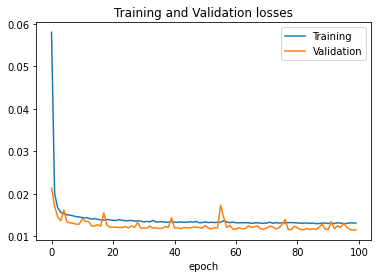

In [ ]:
plt.plot(res.history['loss'])
plt.plot(res.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')